# Mapa Argentina covid-19
- https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

## Vamos con la simple primero, mapas de OSM de fondo

In [1]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
px.set_mapbox_access_token(open(".mapbox_token").read())

In [2]:
sfe = pd.read_csv("data/arcovid19-SFe.csv", sep=";", decimal=",")
last_date = sfe.iloc[len(sfe)-1,0]
last_date = f"{last_date.split('-')[2]}/{last_date.split('-')[1]}/{last_date.split('-')[0]}"
#last_date = "31/05/2020"
sfe.tail()

fecha      localidad      departamento provincia    latitud  \
3287  2020-08-16     Las Toscas  General Obligado  Santa Fe -28.353303   
3288  2020-08-16  Luis Palacios       San Lorenzo  Santa Fe -32.780860   
3289  2020-08-16         Maciel      San Jerónimo  Santa Fe -32.450783   
3290  2020-08-16     Monte Vera        La Capital  Santa Fe -31.517763   
3291  2020-08-16         Videla         San Justo  Santa Fe -30.944120   

       longitud  
3287 -59.281492  
3288 -60.915817  
3289 -60.907562  
3290 -60.687628  
3291 -60.663308

In [3]:
ind = sfe["provincia"]=="Santa Fe"
sfe[ind].count()

fecha           3292
localidad       3292
departamento    3292
provincia       3292
latitud         3292
longitud        3292
dtype: int64

In [4]:
#fig = px.scatter_mapbox(sfe, lat="latitud", lon="longitud", color="fecha",
#                        width=500,height=700, zoom=6,
#                        center={"lat":-30.754560,"lon":-60.987894},)
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

### Mejoramos el mapa

Lo anterior no tiene mucho goyete porque superpone varios de los puntos, entonces vamos a hacer:

- Armar un nuevo dataframe a partir del anterior
- Va a tener una entrada por cada localidad y se le va a sumar la cantidad que hay de esa localidad
- Esa cantidad que hay por localidad nos va a servir para el tamaño del punto
- Para todo esto laburamos con `groupby`

¿Qué cosa creo que sería ideal?  No se, tal vez dividir por departamentos y mostrar con diferente intensidad cada depto

In [5]:
grupo_loca = sfe.groupby("localidad")
df_sfe_to_map = {"localidad":[], "departamento":[], "provincia":[], "latitud":[], "longitud":[], "casos":[]}
for localidad, df_localidad in grupo_loca:
    ind = sfe["localidad"] == localidad
    #una_loca = sfe[ind]
    sfe["casos"] = ""
    sfe.loc[ind,"casos"] = df_localidad.fecha.count()
    d = sfe[ind].iloc[0]
    df_sfe_to_map["localidad"].append(d["localidad"])
    df_sfe_to_map["departamento"].append(d["departamento"])
    df_sfe_to_map["provincia"].append(d["provincia"])
    df_sfe_to_map["latitud"].append(d["latitud"])
    df_sfe_to_map["longitud"].append(d["longitud"])
    df_sfe_to_map["casos"].append(d["casos"])

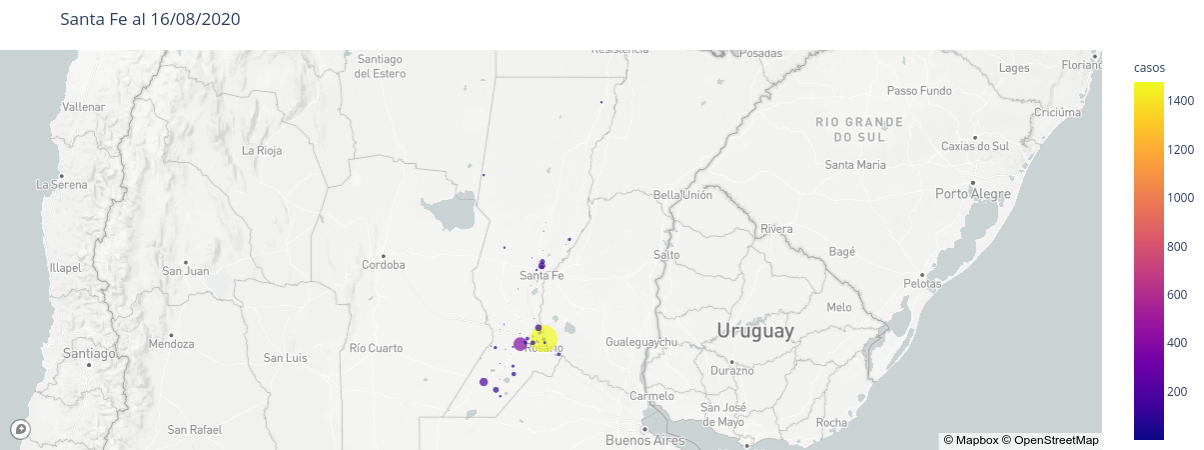

In [6]:
fig = px.scatter_mapbox(df_sfe_to_map, lat="latitud", lon="longitud", color="casos", #width=600,height=740,
                        zoom=5.0, size="casos", hover_name="localidad",hover_data=["casos"],
                        center={"lat":-31.3,"lon":-60.5},
                        #labels={'departamento':'<b>Departamento</b>'},
                        #labels={'provincia':'<b>Provincia</b>'},
                        #color_continuous_scale=px.colors.cyclical.IceFire
                       )
fig.update_layout(title=f"Santa Fe al {last_date}",
                  mapbox_style="light", 
                  margin={"r":0,"t":50,"l":0,"b":0})
# mapbox_style=
# "white-bg", "carto-positron", "stamen-terrain", "stamen-toner" or "stamen-watercolor" 
#Allowed values
#    which do require a Mapbox API token are `'basic'`, `'streets'`,
#    `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-streets'`.

fig.show(config={'displayModeBar': True})

In [7]:
fig.write_html("graphs/mapa_sfe.html", include_plotlyjs="cdn", full_html=False)

## Por departamento en Santa Fe


In [8]:
df = pd.DataFrame(df_sfe_to_map)
ind = df["provincia"] == "Santa Fe"
#fig = px.pie(df[ind], values='casos', names='departamento')
#fig.update_traces(textposition='inside', textfont_size=16)
#fig.update_layout(title=f"Santa Fe por departamentos al {last_date}",
#                  margin={"r":0,"t":50,"l":0,"b":0})
#fig.show(config={'displayModeBar': True})
#fig.write_html("graphs/deptos_sfe.html", include_plotlyjs="cdn", full_html=False)

In [9]:
df[ind].tail(30)

localidad      departamento provincia    latitud  \
86                        San Javier        San Javier  Santa Fe -30.574492   
87            San José de la Esquina           Caseros  Santa Fe -33.116090   
88               San José del Rincón        La Capital  Santa Fe -31.599999   
89                         San Justo         San Justo  Santa Fe -30.787764   
90                       San Lorenzo       San Lorenzo  Santa Fe -32.747952   
91                    Sancti Spiritu     General López  Santa Fe -34.011527   
92                           Sanford           Caseros  Santa Fe -33.144823   
93                          Santa Fe        La Capital  Santa Fe -31.597238   
94                      Santa Isabel     General López  Santa Fe -33.887939   
95           Santa Rosa de Calchines             Garay  Santa Fe -31.416740   
96                      Santa Teresa      Constitución  Santa Fe -33.439051   
97                        Santo Tomé        La Capital  Santa Fe -31.671931   
98                       Sauce Viejo        La Capital  Santa Fe -31.768519   
99                           Soldini           Rosario  Santa Fe -33.021395   
100                       Tacuarendí  General Obligado  Santa Fe -28.415458   
101                          Timbúes       San Lorenzo  Santa Fe -32.660298   
102                          Totoras           Iriondo  Santa Fe -32.589038   
103                    Venado Tuerto     General López  Santa Fe -33.744573   
104                             Vera              Vera  Santa Fe -29.459076   
105                           Videla         San Justo  Santa Fe -30.944120   
106                     Villa Amelia           Rosario  Santa Fe -33.176438   
107                      Villa Cañas     General López  Santa Fe -34.004986   
108               Villa Constitución      Constitución  Santa Fe -33.239043   
109          Villa Gobernador Gálvez           Rosario  Santa Fe -33.022764   
110  Villa La Rivera – Pueblo Andino           Iriondo  Santa Fe -32.637605   
111                     Villa Ocampo  General Obligado  Santa Fe -28.487373   
112                          Villada           Caseros  Santa Fe -33.349302   
113                      Wheelwright     General López  Santa Fe -33.789569   
114                          Zavalla           Rosario  Santa Fe -33.025546   
115                   Ángel Gallardo        La Capital  Santa Fe -31.555146   

      longitud  casos  
86  -59.941015      2  
87  -61.722731     35  
88  -60.600838      1  
89  -60.607081      4  
90  -60.776298    108  
91  -62.258542      1  
92  -61.288108      1  
93  -60.703039    121  
94  -61.710079     87  
95  -60.348324      1  
96  -60.809529      1  
97  -60.815879     20  
98  -60.835583      2  
99  -60.764180      2  
100 -59.267718      1  
101 -60.813062      5  
102 -61.184156      4  
103 -61.977604    164  
104 -60.214647      1  
105 -60.663308      9  
106 -60.675325      2  
107 -61.615792     23  
108 -60.331831     40  
109 -60.639393     27  
110 -60.844974      1  
111 -59.389088     21  
112 -61.458525      3  
113 -61.233710      1  
114 -60.898929     60  
115 -60.676662      5

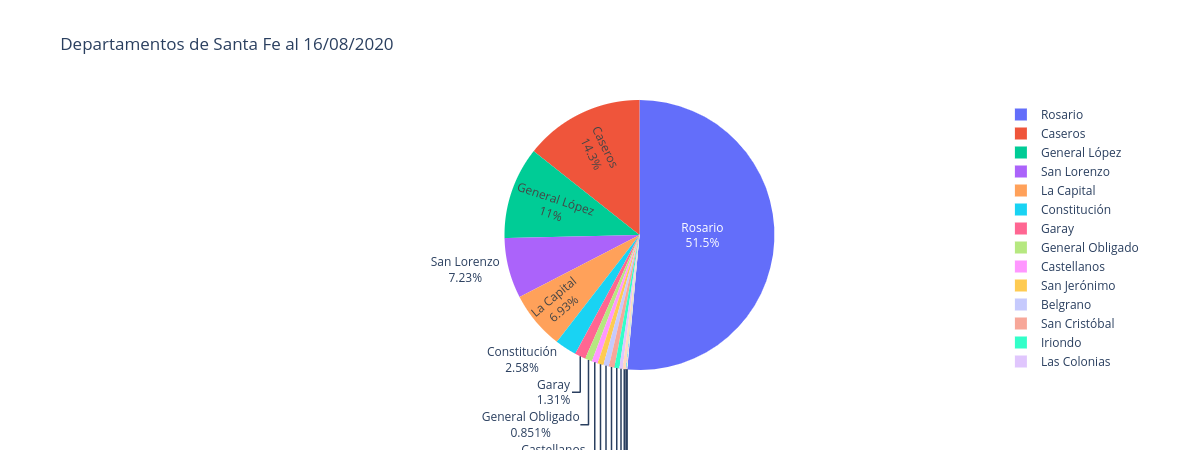

In [10]:
labels = df[ind]["departamento"]
values = df[ind]["casos"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title=f"Departamentos de Santa Fe al {last_date}")
fig.show(config={'displayModeBar': True})
fig.write_html("graphs/deptos_sfe.html", include_plotlyjs="cdn", full_html=False)

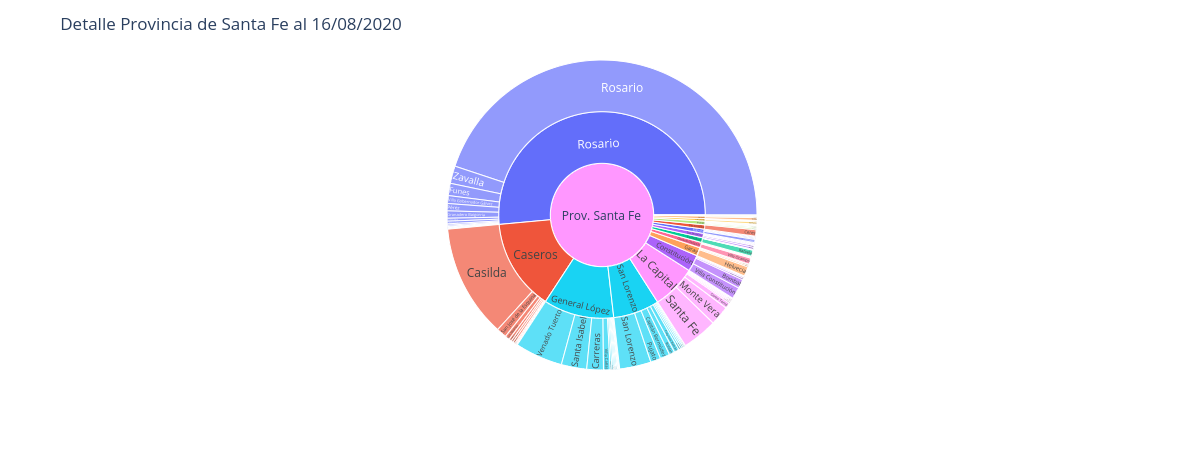

In [11]:
df.loc[ind,'provincia'] = "Prov. Santa Fe"
fig = px.sunburst(df[ind], path=['provincia','departamento', 'localidad'], values='casos', color='departamento', color_continuous_scale='deep',
                  #hover_name="casos_acum",#hover_data=['provincia']
                 )
fig.update_traces(
        go.Sunburst(hovertemplate='<b>%{label} </b> <br> %{value} casos'),
        #insidetextorientation='radial',       
)
fig.update_layout(title=f"Detalle Provincia de Santa Fe al {last_date}")
fig.show(config={'displayModeBar': True})
fig.write_html("graphs/sfe_sunburst.html", include_plotlyjs="", full_html=False)

## Evolución temporal Provincia de Santa Fe por localidades

- Armar un dataframe con las siguientes columnas:
    - fecha
    - localidad
    - depto
    - casos acumulados

In [12]:
santafe = sfe[sfe.provincia == "Santa Fe"]
localidades = list(santafe.localidad.unique())
evolucion = {"fecha":[], "localidad":[],  "casos":[], "acum":[]}
#hoy = "2020-05-31"
hoy = ""
for localidad in localidades:
    acum = 0
    for fecha in list(santafe.fecha.unique())+[hoy]:
        ind = (santafe.fecha == fecha) & (santafe.localidad == localidad)
        #print(fecha, localidad, santafe[ind]["localidad"].count())
        diarios = santafe[ind]["localidad"].count()
        acum += diarios
        evolucion["fecha"].append(fecha)
        evolucion["localidad"].append(localidad)
        evolucion["casos"].append(diarios)
        evolucion["acum"].append(acum)
                
# armo DF del dict previo
dfevo = pd.DataFrame(evolucion)

In [13]:
dffecha = dfevo.groupby("fecha")
actotal = 0
totales = {"fecha":[], "acum":[]}
for f,g in dffecha:
    actotal += g["casos"].sum()
    totales["fecha"].append(f)
    totales["acum"].append(actotal)

# si hoy no hubo casos
#hoy = "2020-05-31"
totales["fecha"].append(hoy)
totales["acum"].append(actotal)

evo_total_provSFE = pd.DataFrame(totales)
evo_total_provSFE.head()

fecha  acum
0                 0
1  2020-03-14     1
2  2020-03-19     2
3  2020-03-21     4
4  2020-03-23    15

In [14]:
#dfevo.sort_values(by=["fecha","casos"], inplace=True)

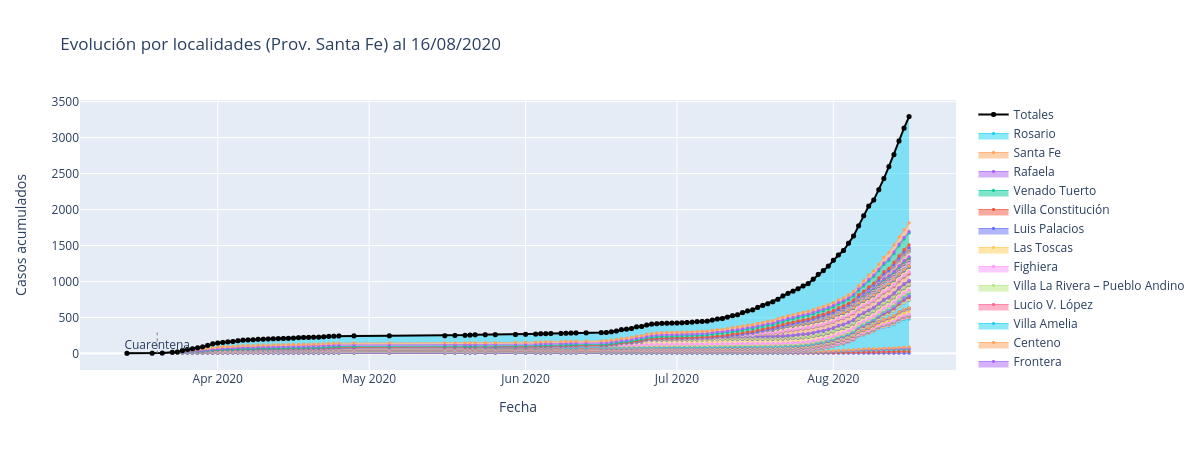

In [15]:
fig = go.Figure()

localidades.remove("Rafaela")
localidades.remove("Rosario")
localidades.remove("Santa Fe")
localidades.remove("Venado Tuerto")
localidades.remove("Villa Constitución")

for localidad in localidades:
    ind = dfevo["localidad"] == localidad
    fig.add_trace(go.Scatter(x = dfevo.loc[ind,"fecha"], y=dfevo.loc[ind,"acum"], mode='lines+markers', 
                             line=dict(width=0.7),
                             stackgroup='one',
                             marker=dict(size=3,),
                             name=localidad
                            )
                 )

for localidad in "Villa Constitución", "Venado Tuerto", "Rafaela", "Santa Fe", "Rosario":
    ind = dfevo["localidad"] == localidad
    fig.add_trace(go.Scatter(x = dfevo.loc[ind,"fecha"], y=dfevo.loc[ind,"acum"], mode='lines+markers', 
                             line=dict(width=0.7),
                             stackgroup='one',
                             marker=dict(size=3,),
                             name=localidad
                            )
                 )
fig.add_trace(go.Scatter(x = evo_total_provSFE["fecha"], y=evo_total_provSFE["acum"], mode='lines+markers', 
                             line=dict(width=2, color="black"),
                             marker=dict(size=5,),
                             name="Totales"
                            )
                 )
    
# Linea vertical 10 días de cuarentena 
fig.add_shape(
        dict(
            type="line",
            x0="2020-03-20",
            y0=0,
            x1="2020-03-20",
            y1=300,
            line=dict(
                color="grey",
                width=1,
                dash="dot",
            )
))

# texto inicio cuarentena
fig.add_trace(go.Scatter(
    x=["2020-03-20",],
    y=[100,],
    text=["Cuarentena",],
    mode="text",
    showlegend=False,
))

fig.update_layout(title_text='Evolución por localidades (Prov. Santa Fe) al '+last_date, 
                  xaxis_title="Fecha", yaxis_title="Casos acumulados",
                 )
fig.show(config={'scrollZoom': True, 'displayModeBar': True,})
fig.write_html("graphs/sfe_evol_localidades.html", include_plotlyjs="", full_html=False)

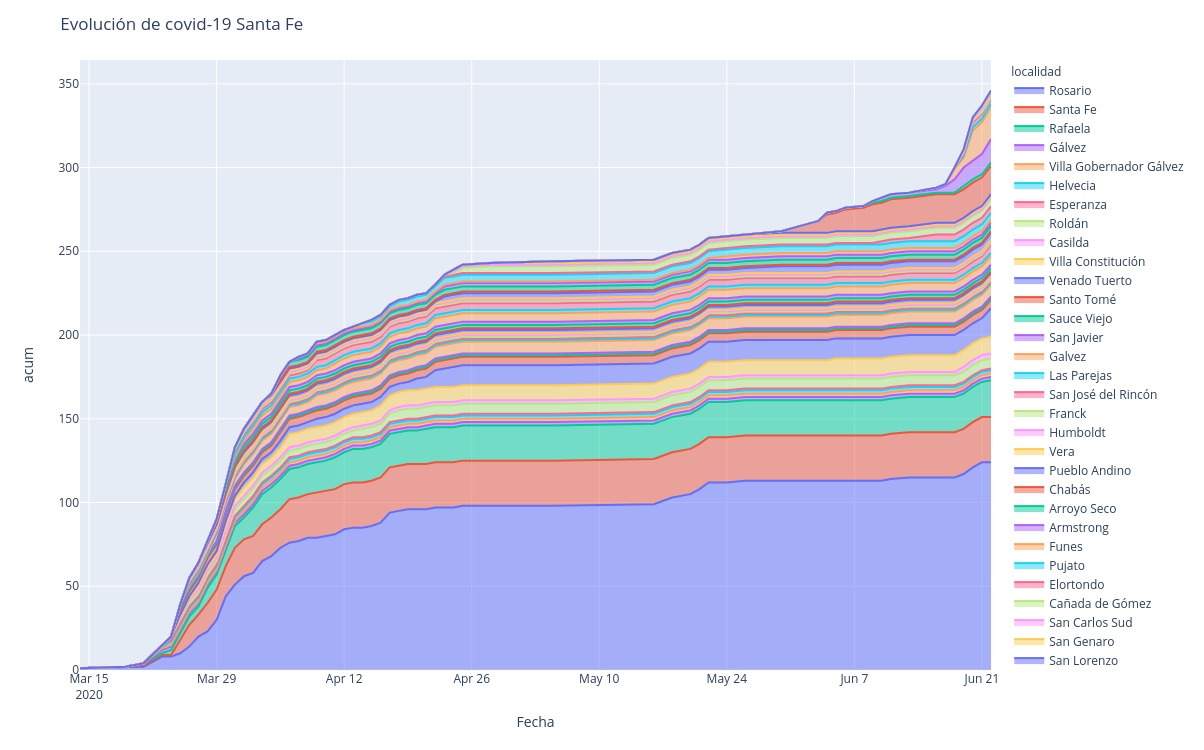

In [29]:
fig = px.area(dfevo, x="fecha", y="acum", color="localidad", height=750,
             labels={'provincia':'<b>Provincias</b>', 'casos_acum':'Casos Acumulados', "fecha":"Fecha"})
fig.update_layout(title_text='Evolución de covid-19 Santa Fe',#yaxis_type="log",
                 #xaxis_rangeslider_visible=True
                 )
fig.show()

## Heatmap SFE

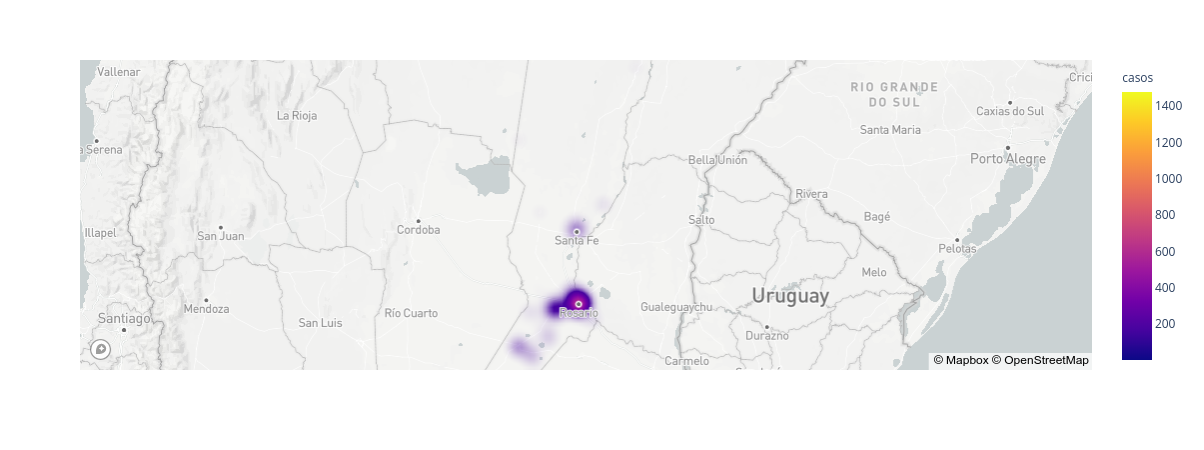

In [16]:
import plotly.express as px
fig = px.density_mapbox(df_sfe_to_map, lat="latitud", lon="longitud", z='casos', radius=20,
                        center={"lat":-31.3,"lon":-60.5}, zoom=5,
                        mapbox_style="light")
fig.show()